# Задача 5  Предобработка данных и PCA
Необходимо провести анализ датасета (из задания 6) и сделать обработку данных по
предложенному алгоритму. Код подготовить в виде файлов *.ipynb и сделать отчет в виде
ноутбука с описанием процесса анализа (*.pdf).


Для начала устанавливаем датасет и нужные библиотеки


После чего проанализируем данные с помощью встроенных комманд.

In [ ]:
import numpy as np # библиотека для эффективной работы с данными
import pandas as pd # библиотека для работы с наборами данных
import matplotlib.pyplot as plt # библиотека для визуализации
import seaborn as sns # еще одна библиотека для построения графиков
data = pd.read_csv('oec.csv')

data.describe()

,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,InclinationDeg,SurfaceTempK,AgeGyr,DiscoveryYear,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr
count,3584.000000,1313.000000,2774.000000,3485.000000,1406.000000,1108.000000,328.000000,43.000000,46.000000,665.000000,741.000000,2.000000,3574.000000,2133.000000,3416.000000,3263.000000,2509.000000,3455.000000,517.000000
mean,0.097656,2.890944,0.371190,537.248317,2.000170,0.166910,150.363823,144.200847,90.624476,82.973840,871.714170,1.502750,2013.300504,554.912346,0.983225,1.495629,0.016228,5505.514501,4.635355
std,0.424554,10.204485,0.416871,7509.660676,19.352699,0.189760,117.859945,127.865952,93.047968,21.402768,699.314463,2.117431,6.159674,847.566803,0.319063,3.071298,0.193495,1204.271777,4.657679
min,0.000000,0.000008,0.002300,0.090706,0.004420,0.000000,-233.000000,-174.640000,-5.112604,-0.000543,102.200000,0.005500,1781.000000,1.295000,0.012000,0.000014,-2.090000,540.000000,0.002200
25%,0.000000,0.150000,0.141062,4.757940,0.053000,0.020000,66.750000,37.167396,1.509500,85.058000,321.800000,0.754125,2013.000000,60.000000,0.830000,0.810000,-0.050000,5113.000000,2.000000
50%,0.000000,0.940000,0.209600,13.071630,0.169500,0.100000,139.700000,162.280000,69.821251,87.800000,719.600000,1.502750,2014.000000,333.000000,0.977000,1.000000,0.020000,5634.000000,4.000000
75%,0.000000,2.500000,0.321518,49.514000,1.250000,0.247282,243.000000,252.625834,169.175000,89.140000,1310.900000,2.251375,2016.000000,773.130000,1.105000,1.250000,0.100000,5940.000000,6.300000
max,3.000000,263.000000,6.000000,320000.000000,662.000000,0.956000,791.000000,339.300000,320.800000,305.000000,7112.000000,3.000000,2017.000000,8500.000000,4.500000,51.100000,0.560000,29300.000000,80.000000


In [ ]:
# выведем 5 первых и 5 последних значений
data

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,...,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,ListsPlanetIsOn
0,HD 143761 b,0,1.0450,NaN,39.845800,0.2196,0.037,270.60,NaN,NaN,...,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
1,HD 143761 c,0,0.0790,NaN,102.540000,0.4123,0.050,190.00,NaN,NaN,...,16/07/11,16 01 03,+33 18 13,17.236,0.889,1.362,-0.31,5627.0,NaN,Confirmed planets
2,KOI-1843.03,0,0.0014,0.054,0.176891,0.0048,NaN,NaN,NaN,NaN,...,13/07/15,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
3,KOI-1843.01,0,NaN,0.114,4.194525,0.0390,NaN,NaN,NaN,NaN,...,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
4,KOI-1843.02,0,NaN,0.071,6.356006,0.0520,NaN,NaN,NaN,NaN,...,NaN,19 00 03.14,+40 13 14.7,NaN,0.460,0.450,0.00,3584.0,NaN,Controversial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579,eta Cet b,0,2.4600,NaN,407.300000,1.2700,0.170,247.20,NaN,NaN,...,15/12/11,01 08 35.39148,-10 10 56.1570,37.990,1.700,14.300,0.12,4528.0,NaN,Confirmed planets
3580,eta Cet c,0,3.1600,NaN,744.300000,1.9300,0.020,36.67,NaN,NaN,...,15/12/11,01 08 35.39148,-10 10 56.1570,37.990,1.700,14.300,0.12,4528.0,NaN,Confirmed planets
3581,HD 108874 b,0,1.3600,NaN,395.400000,1.0510,0.070,NaN,NaN,NaN,...,10/12/29,12 30 26,+22 52 47,68.500,1.000,1.220,0.14,5407.0,NaN,Confirmed planets
3582,HD 108874 c,0,1.0180,NaN,1605.800000,2.6800,0.250,NaN,NaN,NaN,...,10/12/29,12 30 26,+22 52 47,68.500,1.000,1.220,0.14,5407.0,NaN,Confirmed planets


Также выведем общую информацию о датасете

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3584 entries, 0 to 3583
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PlanetIdentifier      3584 non-null   object 
 1   TypeFlag              3584 non-null   int64  
 2   PlanetaryMassJpt      1313 non-null   float64
 3   RadiusJpt             2774 non-null   float64
 4   PeriodDays            3485 non-null   float64
 5   SemiMajorAxisAU       1406 non-null   float64
 6   Eccentricity          1108 non-null   float64
 7   PeriastronDeg         328 non-null    float64
 8   LongitudeDeg          43 non-null     float64
 9   AscendingNodeDeg      46 non-null     float64
 10  InclinationDeg        665 non-null    float64
 11  SurfaceTempK          741 non-null    float64
 12  AgeGyr                2 non-null      float64
 13  DiscoveryMethod       3521 non-null   object 
 14  DiscoveryYear         3574 non-null   float64
 15  LastUpdated          

# №1 Сколько в наборе данных объектов и признаков? Дать описание каждому признаку, если оно есть


In [ ]:
data.shape


(3584, 25)

Таблица содержит 25 признаков и 3584 объекта

Возьмём описание переменных из репозитория проекта https://github.com/OpenExoplanetCatalogue/oec_tables/blob/master/FIELDS.md

Описание переменных (на русском)
=====================================



1. `name` - Основной идентификатор планеты
2. `binaryflag` - Бинарный флаг [0=нет известного звездного двойного компаньона; 1 = двоичный P-тип (циркулярный); 2=двоичный S-тип; 3 = планета-сирота (без звезды)]
3. `mass` - Масса планеты [массы Юпитера]
4. `radius` - Радиус [радиусы Юпитера]
5. `period` - Период [дни]
6. `semimajoraxis` - Полуось [астрономические единицы]
7. `eccentricity` - Эксцентриситет
8. `periastron` - Периастрон [гусы]
9. `longitude` - Долгота [градусы]
10. `ascendingnode` - Восходящий узел [градусы]
11. `inclination` - Наклонение [градусы]
12. `temperature` - Поверхностная или равновесная температура [K]
13. `age` - Возраст [Га]
14. `discoverymethod` - Метод обнаружения
15. `discoveryyear` - Год обнаружения [гггг]
16. `lastupdate` - Последнее обновление [гг/мм/дд]
17. `system_rightascension` - Прямое восхождение системы [чч мм сс]
18. `system_declination` - Склонение системы [+/-гг мм сс]
19. `system_distance` - Расстояние от Солнца [парсек]
20. `hoststar_mass` - Масса хозяйствующей звезды [солнечные массы]
21. `hoststar_radius` - Радиус хозяйствующей звезды [солнечные радиусы]
22. `hoststar_metallicity` - Металличность хозяйствующей звезды [логарифм относительно солнечной]
23. `hoststar_temperature` - Температура хозяйствующей звезды [K]
24. `hoststar_age` - Возраст хозяйствующей звезды [Га]
25. `list` - Список списков, на котором находится планета

Описание переменных (на английском)
==================

1. `name` Primary identifier of planet

2. `binaryflag` Binary flag [0=no known stellar binary companion; 1=P-type binary (circumbinary); 2=S-type binary; 3=orphan planet (no star)]

3. `mass` Planetary mass [Jupiter masses]

4. `radius` Radius [Jupiter radii]

5. `period` Period [days]

6. `semimajoraxis` Semi-major axis [Astronomical Units]

7. `eccentricity` Eccentricity

8. `periastron` Periastron [degree]

9. `longitude` Longitude [degree]

10. `ascendingnode` Ascending node [degree]

11. `inclination` Inclination [degree]

12. `temperature` Surface or equilibrium temperature [K]

13. `age` Age [Gyr]

14. `discoverymethod` Discovery method

15. `discoveryyear` Discovery year [yyyy]

16. `lastupdate` Last updated [yy/mm/dd]

17. `system_rightascension` Right ascension [hh mm ss]

18. `system_declination` Declination [+/-dd mm ss]

19. `system_distance` Distance from Sun [parsec]

20. `hoststar_mass` Host star mass [Solar masses]

21. `hoststar_radius` Host star radius [Solar radii]

22. `hoststar_metallicity` Host star metallicity [log relative to solar]

23. `hoststar_temperature` Host star temperature [K]

24. `hoststar_age` Host star age [Gyr]

25. `list` A list of lists the planet is on



# Сколько категориальных признаков, какие?
**2  признака - ListsPlanetIsOn и BinaryFlag**

Из описание признака BinaryFlag видно, что он может иметь 5 различных значений, а вот про ListsPlanetIsOn ничего не написано, рассмотрим этот признак

In [ ]:
Categorial_2 = np.unique(data["ListsPlanetIsOn"]) # Массив уникальных значений столбца ListsPlanetIsOn
[print(List) for List in (np.unique(data["ListsPlanetIsOn"]))] # выведем построчно все уникальные значения
print("Количество уникальных значений", data["ListsPlanetIsOn"].nunique())


Confirmed planets
Confirmed planets, Orphan planets
Confirmed planets, Planets in binary systems, P-type
Confirmed planets, Planets in binary systems, P-type, Planets in globular clusters
Confirmed planets, Planets in binary systems, S-type
Confirmed planets, Planets in open clusters
Controversial
Controversial, Planets in binary systems, P-type
Controversial, Planets in binary systems, S-type
Kepler Objects of Interest
Planets in binary systems, S-type, Confirmed planets
Retracted planet candidate
Solar System
Количество уникальных значений 13


Количество различных уникальных значений столбца ListsPlanetIsOn, видно, что часть этих значений, например Planets in binary systems, P-type, S-type, уже есть в значении BinaryType. Поэтому оставим бинарный признак, точно ли это планета, или нет (Confirmed planets)

In [ ]:
data["Confirmed"] = data["ListsPlanetIsOn"].apply(lambda x: 1 if "Confirmed planets" in x else 0)
data = data[data.columns.drop(['ListsPlanetIsOn'])] # удаляем столбец ListsPlanetIsOn

обработаем его

#3. Столбец с максимальным количеством уникальных значений категориального признака?
ListsPlanetIsOn

# 4. Есть ли бинарные признаки?
Нет, хоть есть столбец с названием BinaryFlag, но он может иметь 5 значений, а значит это не бинарный признак.

# 5. Какие числовые признаки?


In [ ]:
numeric_features = data.select_dtypes(include=['float64']).columns
print("Числовые признаки:", numeric_features)
print("Количество числовых признаков: ", len(numeric_features))

Числовые признаки: Index(['PlanetaryMassJpt', 'RadiusJpt', 'PeriodDays', 'SemiMajorAxisAU',
       'Eccentricity', 'PeriastronDeg', 'LongitudeDeg', 'AscendingNodeDeg',
       'InclinationDeg', 'SurfaceTempK', 'AgeGyr', 'DiscoveryYear',
       'DistFromSunParsec', 'HostStarMassSlrMass', 'HostStarRadiusSlrRad',
       'HostStarMetallicity', 'HostStarTempK', 'HostStarAgeGyr'],
      dtype='object')
Количество числовых признаков:  18


# 6. Есть ли пропуски?


Рассмотрим все столбцы, в которых есть пропуски

In [ ]:
from pandas.core import resample
null_count = data.isnull().sum() # столбец и количество пропусков в нём
sorted_cols = null_count.sort_values(ascending=False).index.tolist()
data_sorted = data[sorted_cols]
null_count_sorted = null_count[sorted_cols].to_frame(name='null_count')
print(null_count_sorted)

                      null_count
AgeGyr                      3582
LongitudeDeg                3541
AscendingNodeDeg            3538
PeriastronDeg               3256
HostStarAgeGyr              3067
InclinationDeg              2919
SurfaceTempK                2843
Eccentricity                2476
PlanetaryMassJpt            2271
SemiMajorAxisAU             2178
DistFromSunParsec           1451
HostStarMetallicity         1075
RadiusJpt                    810
HostStarRadiusSlrRad         321
HostStarMassSlrMass          168
HostStarTempK                129
PeriodDays                    99
DiscoveryMethod               63
DiscoveryYear                 10
RightAscension                10
Declination                   10
LastUpdated                    8
PlanetIdentifier               0
TypeFlag                       0
Confirmed                      0


Да, как видно объектов с пропусками достаточно много, в некоторых столбцах пропусков слишком много (столбец AgeGyr имеет только 2 не null значения).
В будущем следует исключить эти строки из датасета.

# 7. Сколько объектов с пропусками?


Объектов без пропусков 3, значит все оставшиеся объекты с пропусками, значит из 22.

# 8. Столбец с максимальным количеством пропусков?
Столбец AgeGyr имеет только 2 значения, остальные все пропуски

# 9. Есть ли на ваш взгляд выбросы, аномальные значения?


Рассмотрим общую информацию

In [ ]:
data.describe()

,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,InclinationDeg,SurfaceTempK,AgeGyr,DiscoveryYear,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,Confirmed
count,3584.000000,1313.000000,2774.000000,3485.000000,1406.000000,1108.000000,328.000000,43.000000,46.000000,665.000000,741.000000,2.000000,3574.000000,2133.000000,3416.000000,3263.000000,2509.000000,3455.000000,517.000000,3584.000000
mean,0.097656,2.890944,0.371190,537.248317,2.000170,0.166910,150.363823,144.200847,90.624476,82.973840,871.714170,1.502750,2013.300504,554.912346,0.983225,1.495629,0.016228,5505.514501,4.635355,0.967634
std,0.424554,10.204485,0.416871,7509.660676,19.352699,0.189760,117.859945,127.865952,93.047968,21.402768,699.314463,2.117431,6.159674,847.566803,0.319063,3.071298,0.193495,1204.271777,4.657679,0.176995
min,0.000000,0.000008,0.002300,0.090706,0.004420,0.000000,-233.000000,-174.640000,-5.112604,-0.000543,102.200000,0.005500,1781.000000,1.295000,0.012000,0.000014,-2.090000,540.000000,0.002200,0.000000
25%,0.000000,0.150000,0.141062,4.757940,0.053000,0.020000,66.750000,37.167396,1.509500,85.058000,321.800000,0.754125,2013.000000,60.000000,0.830000,0.810000,-0.050000,5113.000000,2.000000,1.000000
50%,0.000000,0.940000,0.209600,13.071630,0.169500,0.100000,139.700000,162.280000,69.821251,87.800000,719.600000,1.502750,2014.000000,333.000000,0.977000,1.000000,0.020000,5634.000000,4.000000,1.000000
75%,0.000000,2.500000,0.321518,49.514000,1.250000,0.247282,243.000000,252.625834,169.175000,89.140000,1310.900000,2.251375,2016.000000,773.130000,1.105000,1.250000,0.100000,5940.000000,6.300000,1.000000
max,3.000000,263.000000,6.000000,320000.000000,662.000000,0.956000,791.000000,339.300000,320.800000,305.000000,7112.000000,3.000000,2017.000000,8500.000000,4.500000,51.100000,0.560000,29300.000000,80.000000,1.000000


Чтобы увидеть аномальные значения, сравним максимальное значения и значение 75%

Аномальные значения моджно увидеть в 2 и 4 столбцах, особенно в PeriodDays (49 << 320000)


In [ ]:
data["PeriodDays"].max() / 365 # Самый большой период вращения планеты вокруг звезды в земных годах

876.7123287671233

In [ ]:
# вычисление 75-перцентиля в столбце
percentile_75 = data['PeriodDays'].quantile(0.75)

# вычисление порогового значения
threshold = percentile_75 * 1000

# выбор строк с аномальными значениями
anomalies = data[data['PeriodDays'] > threshold]
anomalies

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,...,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,Confirmed
415,Neptune,0,0.053953,0.352219,60190.03,30.069528,0.008954,46.681587,304.222893,131.786359,...,12/01/01,NaN,NaN,NaN,1.000,1.00,1.000000e-08,5778.0,4.570,0
416,Pluto,0,0.000008,0.016438,90553.02,39.486860,0.248852,224.097026,238.965350,110.301680,...,12/01/01,NaN,NaN,NaN,1.000,1.00,1.000000e-08,5778.0,4.570,0
421,HR 8799 b,0,5.000000,0.700000,166510.00,67.960000,0.000000,NaN,NaN,60.890000,...,15/11/26,23 07 28.71507,+21 08 03.3053,39.400,1.516,1.44,-4.700000e-01,7193.0,0.033,1
422,HR 8799 c,0,7.000000,1.000000,83255.00,42.810000,0.000000,NaN,NaN,65.680000,...,15/11/26,23 07 28.71507,+21 08 03.3053,39.400,1.516,1.44,-4.700000e-01,7193.0,0.033,1
1802,HD 131399 Ab,2,4.000000,NaN,200883.21,80.000000,0.350000,NaN,NaN,NaN,...,16/07/06,14 54 25.30919,-34 08 34.0412,NaN,1.820,NaN,NaN,9300.0,NaN,1
3005,Fomalhaut b,2,NaN,NaN,320000.00,177.000000,0.800000,26.000000,NaN,152.000000,...,13/05/12,22 57 39,-29 37 20,7.704,1.920,1.84,NaN,8590.0,NaN,0


Не все из этих планет действительно существуют , планеты Fomalhaut b на самом деле нет
https://www.techinsider.ru/science/news-570634-ischeznuvshaya-ekzoplaneta-okazalas-oblakom-pyli/


Аномальных значений в этом столбце я не вижу.

Text(0, 0.5, 'PlanetaryMassJpt')

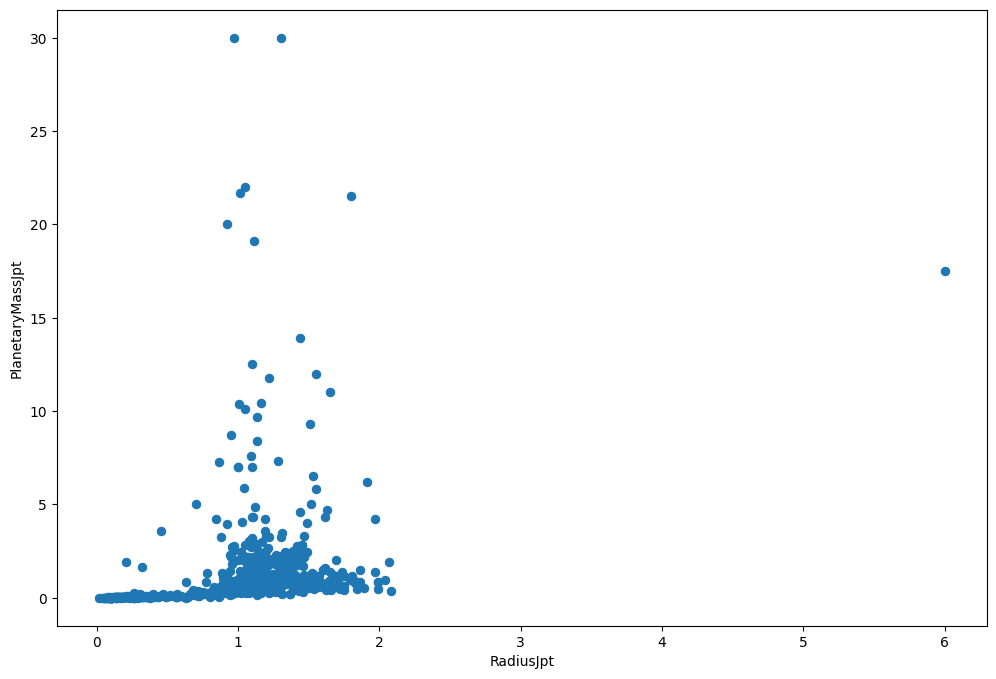

In [ ]:
#посмотрим на давление верхнее и нижнее
plt.figure(figsize=(12,8))
#plt.scatter(features_std, data.Fare, s=9, c=data.Survived, cmap='seismic')
plt.scatter(data.RadiusJpt, data.PlanetaryMassJpt, linewidth=0.8)

plt.xlabel('RadiusJpt')
plt.ylabel('PlanetaryMassJpt')

In [ ]:
data[data["RadiusJpt"] > 3]

,PlanetIdentifier,TypeFlag,PlanetaryMassJpt,RadiusJpt,PeriodDays,SemiMajorAxisAU,Eccentricity,PeriastronDeg,LongitudeDeg,AscendingNodeDeg,...,LastUpdated,RightAscension,Declination,DistFromSunParsec,HostStarMassSlrMass,HostStarRadiusSlrRad,HostStarMetallicity,HostStarTempK,HostStarAgeGyr,Confirmed
1680,HD 100546 b,0,17.5,6.0,NaN,53.0,NaN,NaN,NaN,NaN,...,14/12/26,11 33 25,-70 11 41,97.0,2.4,NaN,NaN,10500.0,0.005,1


Единственная планета, у которой радиус больше 3, выглядит как аномальное значение, удалим его.

In [ ]:
data = data.drop(index=1680) # индекс планеты с аномально высокой массой

# 10. Столбец с максимальным средним значением после нормировки признаков через стандартное отклонение?

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.select_dtypes(include=['float64']))

column_means = np.nanmean(scaled_data, axis=0)
max_mean_idx = np.argmax(column_means)

column_names = data.select_dtypes(include=['float64']).columns
max_mean_col = column_names[max_mean_idx]
max_mean_values = data[max_mean_col]


print(f"Столбец с самым высоким средним значением после масштабирования признаков по стандартному отклонению является столбцом: {max_mean_col}")


Столбец с самым высоким средним значением после масштабирования признаков по стандартному отклонению является столбцом: HostStarMassSlrMass


# 11. Столбцы с целевым признаком?


SurfaceTempK, RadiusJpt, SemiMajorAxisAU, HostStarMassSlrMass, HostStarRadiusSlrRad, HostStarMetallicity, HostStarTempK

# 12. Сколько объектов попадает в тренировочную выборку при использовании train_test_split с параметрами test_size = 0.3, random_state = 42?

In [ ]:
from sklearn.model_selection import train_test_split

#Для начала отбросим ненужные столбцы

# выбор столбцов с количеством пустых значений больше, чем n
n = 3000
columns_to_drop = null_count[null_count > n].index
# удаление выбранных столбцов
data = data.drop(columns_to_drop, axis=1)

data_sel = data
data_sel.dropna(subset=['SurfaceTempK', 'RadiusJpt', 'SemiMajorAxisAU', 'PlanetaryMassJpt',
# 'HostStarMassSlrMass',
# 'HostStarRadiusSlrRad',
# 'HostStarMetallicity',
# 'HostStarTempK',
],
inplace=True)

def is_jupyter(x):
    """
    Функция для проверки, находится ли значение в пределах 10% от 1.
    """
    diff = abs(x - 1)
    return diff / 1 <= 0.1

# Создаем новый столбец 'Jupyters' с использованием функции is_jupyter.
data_sel['Jupyters'] = data_sel['PlanetaryMassJpt'].apply(is_jupyter)
Jupyters = data_sel.loc[:, data_sel.columns.isin(["Jupyters"])]


train = data_sel.loc[:, data_sel.columns.isin(['SurfaceTempK', 'RadiusJpt', 'SemiMajorAxisAU',
# 'HostStarMassSlrMass',
# 'HostStarRadiusSlrRad',
# 'HostStarMetallicity',
# 'HostStarTempK',
])]


X_train, X_test, y_train, y_test = train_test_split(train, Jupyters, test_size=0.3, random_state=42)
print("Количество объектов в тренировочной выборке", len(X_train))

Количество объектов в тренировочной выборке 206


# 13. Между какими признаками наблюдается линейная зависимость (корреляция)?


Для того, чтобы оценить коореляцию построим таблицу корреляций переменных с друг другом.

<ipython-input-18-a5a8f2467c72>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_sel.corr(), xticklabels=data_sel.corr().columns, yticklabels=data_sel.corr().columns, cmap='RdYlGn', center=0, annot=True)


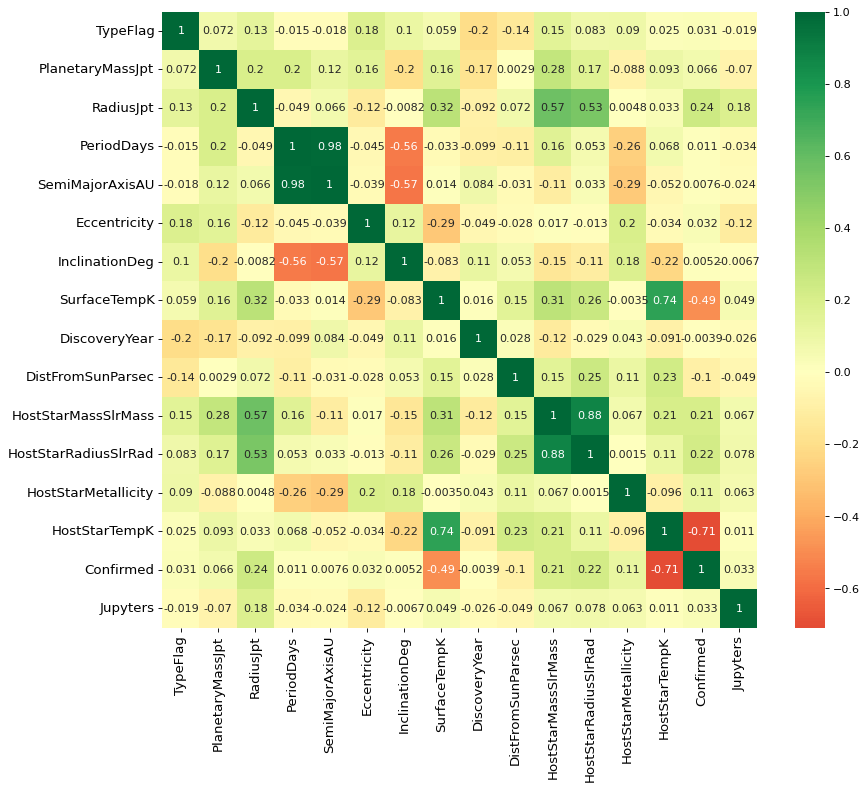

In [ ]:
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data_sel.corr(), xticklabels=data_sel.corr().columns, yticklabels=data_sel.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Из таблицы видно, что признак *PeriodDays* практически полностью ( на 97% ) зависит от *SemiMajorAxisAU*

Также есть зависимость между признаками *SurfaceTemp* ~ *HostStarTempK* и *HostStarRadiusSlrRad* и *HostStarMassSlrMass*, около 90%.

# 14. Сколько признаков достаточно для объяснения 90% дисперсии после применения метода PCA?
# 15. Какой признак вносит наибольший вклад в первую компоненту?


Возьмём преобразованные переменные и используем на них метод PCA.

In [ ]:
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib.pyplot as plt

# создание нового dataframe с данными для выбранных планет
new_df = data
# масштабирование данных
scaler = StandardScaler()
features = ['SurfaceTempK', 'RadiusJpt', 'PeriodDays', 'PlanetaryMassJpt','HostStarTempK']
scaled_features = scaler.fit_transform(new_df[features])
scaled_df = pd.DataFrame(scaled_features, columns=['SurfaceTempK_scaled', 'RadiusJpt_scaled', 'PeriodDays_scaled', 'PlanetaryMassJpt_scaled', 'HostStarTempK_scaled'])
scaled_df.dropna(inplace=True)
X_train = scaler.fit_transform(scaled_df)


pca = PCA()
pca.fit(X_train)
X_pca = pca.transform(X_train)

In [ ]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1,
          round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,scaled_df.columns)))

1 component: 37.85% of initial variance
0.669 x SurfaceTempK_scaled + 0.318 x RadiusJpt_scaled + 0.070 x PeriodDays_scaled + 0.275 x PlanetaryMassJpt_scaled + 0.608 x HostStarTempK_scaled
2 component: 23.41% of initial variance
-0.203 x SurfaceTempK_scaled + 0.121 x RadiusJpt_scaled + 0.692 x PeriodDays_scaled + 0.649 x PlanetaryMassJpt_scaled + -0.213 x HostStarTempK_scaled
3 component: 20.88% of initial variance
0.046 x SurfaceTempK_scaled + -0.768 x RadiusJpt_scaled + 0.462 x PeriodDays_scaled + -0.206 x PlanetaryMassJpt_scaled + 0.391 x HostStarTempK_scaled
4 component: 13.89% of initial variance
0.037 x SurfaceTempK_scaled + 0.487 x RadiusJpt_scaled + 0.546 x PeriodDays_scaled + -0.679 x PlanetaryMassJpt_scaled + -0.052 x HostStarTempK_scaled
5 component: 3.96% of initial variance
0.712 x SurfaceTempK_scaled + -0.241 x RadiusJpt_scaled + 0.073 x PeriodDays_scaled + -0.025 x PlanetaryMassJpt_scaled + -0.655 x HostStarTempK_scaled


In [ ]:

count = 0
for i, component in enumerate(pca.components_):
    count += round(100 * pca.explained_variance_ratio_[i], 2)
    if count > 90:
      print(f"Для объяснения 90% дисперсии нужно такое количество переменных  - {i+1}")
      break

Для объяснения 90% дисперсии нужно такое количество переменных  - 4


На первую компоненту больше всего влияние оказывает переменная *HostStarMassSlrMass*

# 16. Построить двухмерное представление данных с помощью алгоритма t-SNE. Насколько кластеров визуально, на ваш взгляд, разделяется выборка? Объяснить смысл кластеров.

Применим алгоритм tSNE и рассмотрим получившийся график

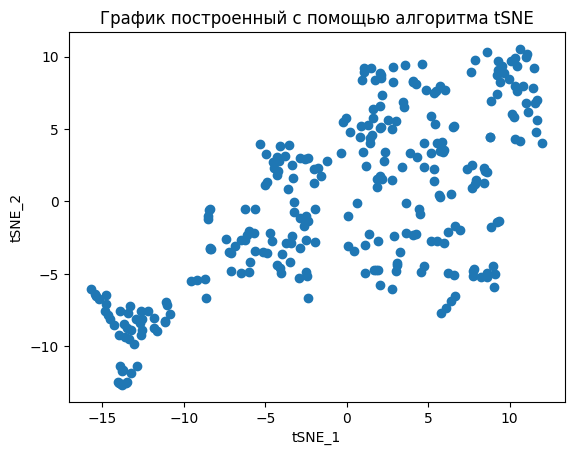

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,
            # verbose=1, perplexity=40,
            n_iter=300
            )
tsne.fit(X_train)

# Уменьшаем размерность при помощи метода главных компонент
pca = PCA(n_components=2).fit(X_train)
pca_2d = pca.transform(X_train)

# передаем данные и получаем новые координаты
new_data = tsne.fit_transform(X_train)

# создаем график
plt.scatter(new_data[:,0], new_data[:,1])
plt.xlabel('tSNE_1')
plt.ylabel('tSNE_2')
plt.title('График построенный с помощью алгоритма tSNE')
plt.show()

Если оценивать получившуюся картинку визуально, то получается где-то 3 класстера, хотя возможно на большем количестве данных получилось бы большее или меньшее их количество. Также на рисунке видны различные планеты, которые не содержатся ни в каких класстерах.


На первую и вторую компоненту оказывает влияние слишком много различных переменных, так что нельзя точно сказать, что означают те или иные кластеры, получившиеся в результате этого алгоритма.